En este ejemplo se cargara un archivo .csv llamado articulos_ml que contiene diversas URLs a artículos sobre Machine Learning de algunos sitios importantes.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from matplotlib import _cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Cargamos los datos de entrada
data = pd.read_csv('articulos_ml.csv')
data

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000
...,...,...,...,...,...,...,...,...
156,[Log] 83: How Google Uses Machine Learning And...,[Log] 83: http://feedproxy.google.com/~r/Techc...,3239,3,11.0,1,84,3239
157,[Log] 84: Zuck Knows If You've Been Bad Or Goo...,[Log] 84: http://feedproxy.google.com/~r/Techc...,2566,3,8.0,4,85,25019
158,[Log] 85: Microsoft Improves Windows Phone Voi...,[Log] 85: http://feedproxy.google.com/~r/Techc...,2089,4,4.0,1,86,49614
159,[Log] 86: How Google's Acquisition Of DNNresea...,[Log] 86: http://feedproxy.google.com/~r/Techc...,1530,4,12.0,3,87,33660


### Contenido dataframe
El dataframe esta constituido por 161 filas y 8 columnas, las cuales son:

* Title: titulo del artículo
* url: ruta al artículo
* Word count: la cantidad de palabras del artículo
* of Links: los enlaces externos que contiene
* of comments: cantidad de comentarios
* Images video: suma de imágenes (o videos)
* Elapsed days: la cantidad de días transcurridos al momento de crear el archivo
* Shares: cantidad de veces que se compartio el archivo

In [3]:
data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


Podemos ver que la media de palabras en los artículos es de 1808. El artículo más corto tiene 250 palabras y el más extenso 8401. A continuación, se utilizara la relación lineal, para ver si hay una correlación entre la cantidad de palabras del texto y la cantidad de compartidos obtenidos.

C:\Users\Electro\AppData\Local\Temp\ipykernel_11092\1419454820.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data.drop(['Title','url','Elapsed days'],1).hist()


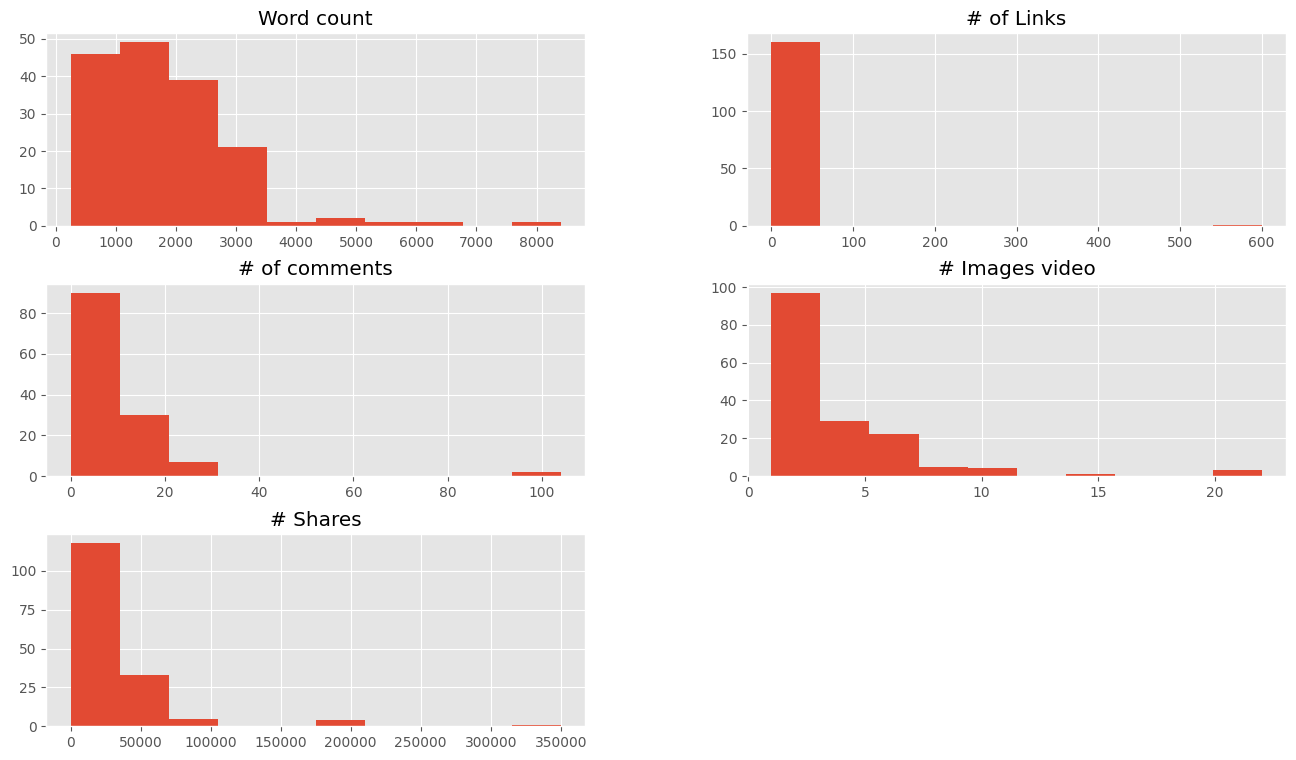

In [4]:
data.drop(['Title','url','Elapsed days'],1).hist()
plt.show()

Con estas gráficas se puede observar que los valores se concentran en ciertos intervalos. A continuación, se filtraran los datos de cantidad de palabras obteniendo solo los registros con menos de 3500 palabras y también se filtrara aquellos que tengan menos de 80000 compartidos. Además, se graficara pintando de azul los puntos con menos de 1808 palabras (media) y en naranja los que tengan más.

<function matplotlib.pyplot.show(close=None, block=None)>

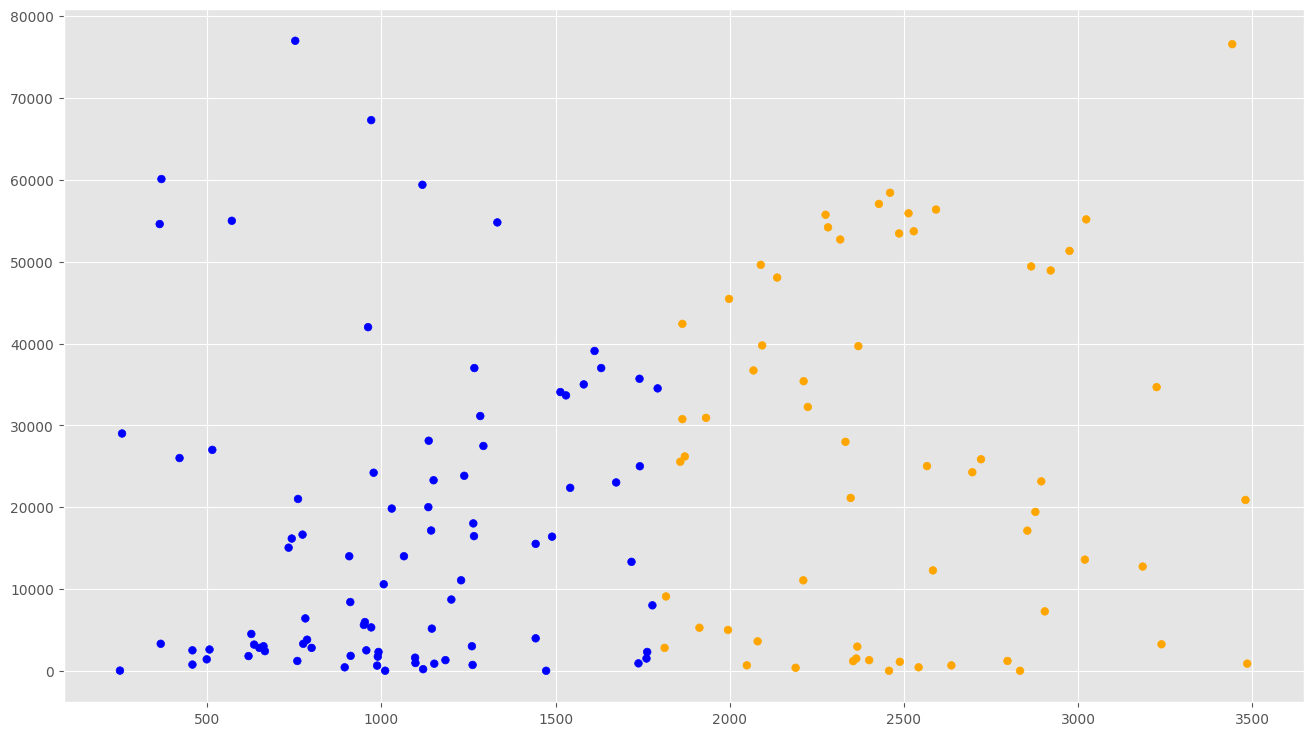

In [5]:
# Recorta los datos en la zona donde se concentran más los puntos
# En el eje X: 0 a 3500
# En el eje Y: 0 a 80000
data_filtro = data[(data['Word count'] <= 3500) & (data['# Shares'] <= 80000)]

colores = ['orange','blue']
tamaño = [30,60]

f1 = data_filtro['Word count'].values
f2 = data_filtro['# Shares'].values

asignar = []
for index, row in data_filtro.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])

plt.scatter(f1, f2, c=asignar, s=tamaño[0])
plt.show

A continuación, se procedera a entrenar el modelo y finalmente se imprimiran los coeficientes obtenidos.

In [7]:
# Se asigna X como variable de entrada para entrenamiento y la variable Y para las etiquetas.
dataX = data_filtro[['Word count']]
x_train = np.array(dataX)
y_train = data_filtro['# Shares'].values

# Crea el objeto de Regresión Lineal
regresion = linear_model.LinearRegression()

# Entrena el modelo
regresion.fit(x_train, y_train)

# Hace las predicciones, dibujando una línea
y_pred = regresion.predict(x_train)

# Muestra los coeficientes obtenido
print('Coeficiente: ', regresion.coef_)
# Valor donde corta el eje Y (X=0)
print('Termino independiente: ', regresion.intercept_)
# Error cuadratico medio
print('Error cuadratico medio: %.2f' % mean_squared_error(y_train, y_pred))
# Varianza
print('Varianza: %.2f' % r2_score(y_train, y_pred))

Coeficiente:  [5.69765366]
Termino independiente:  11200.30322307416
Error cuadratico medio: 372888728.34
Varianza: 0.06


Analizando los resultados podemos ver que el error cuadratico medio es un valor demasiado grande y la varianza esta muy alejada del valor 1. Por lo tanto, este modelo no será muy bueno prediciendo.

<function matplotlib.pyplot.show(close=None, block=None)>

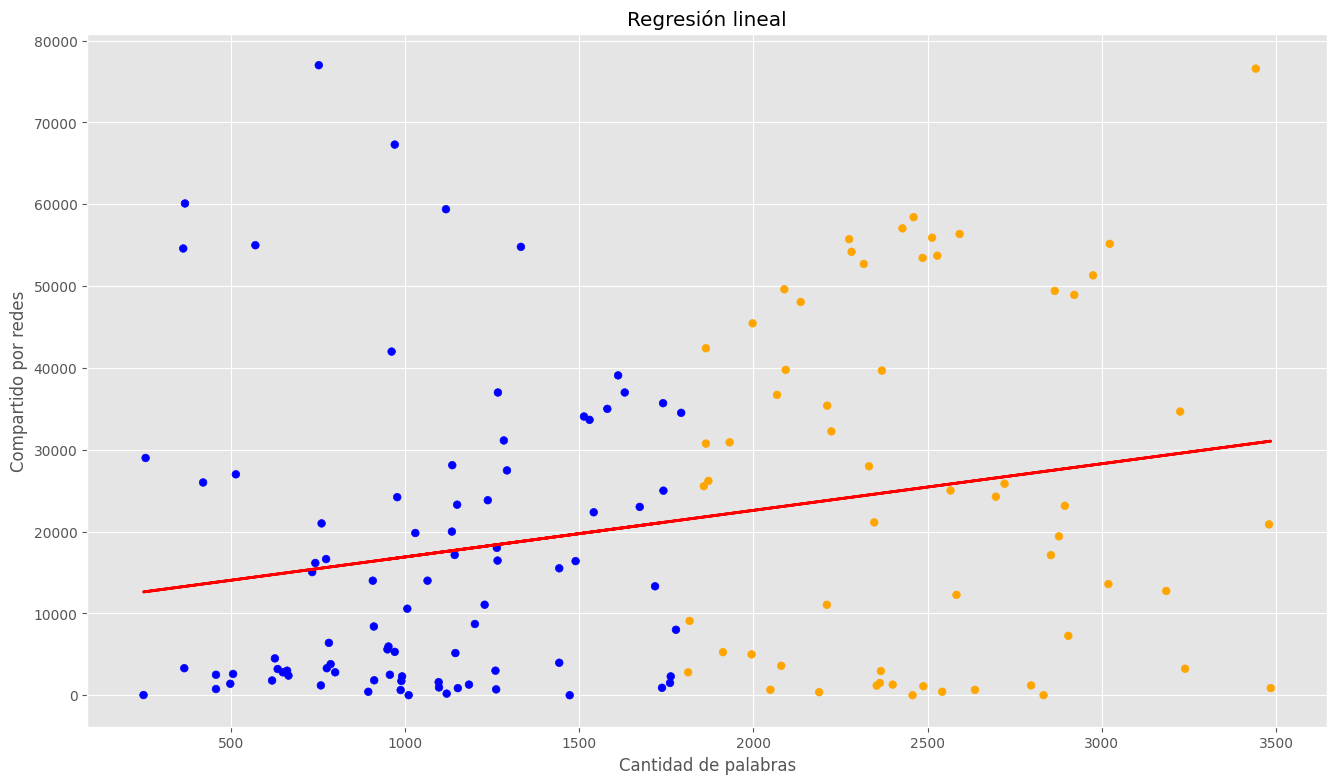

In [9]:
plt.scatter(x_train[:,0], y_train, c=asignar, s=tamaño[0])
plt.plot(x_train[:,0], y_pred, color='red', linewidth=2)
plt.xlabel('Cantidad de palabras')
plt.ylabel('Compartido por redes')
plt.title('Regresión lineal')
plt.show